In [1]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LinearRegression
 from sklearn.metrics import mean_squared_error, r2_score


In [2]:
 url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"


In [8]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

# Read the CSV file from the URL
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [9]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
print("Dataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [11]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std  

In [13]:
X = df.drop('medv', axis=1)

In [14]:
y = df['medv']
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (506, 13)
Target shape: (506,)


In [15]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 print("Training features shape:", X_train.shape)
 print("Testing features shape:", X_test.shape)


Training features shape: (404, 13)
Testing features shape: (102, 13)


In [16]:
 lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("Model training complete.")

Model training complete.


In [17]:
 coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr_model.coef_
 })
 print(coef_df)

    Feature  Coefficient
0      crim    -0.113056
1        zn     0.030110
2     indus     0.040381
3      chas     2.784438
4       nox   -17.202633
5        rm     4.438835
6       age    -0.006296
7       dis    -1.447865
8       rad     0.262430
9       tax    -0.010647
10  ptratio    -0.915456
11        b     0.012351
12    lstat    -0.508571


In [18]:
 print("\nIntercept:", lr_model.intercept_)


Intercept: 30.24675099392349


In [20]:
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 24.291119474973538


In [21]:
 print("R² Score:", r2)

R² Score: 0.6687594935356317


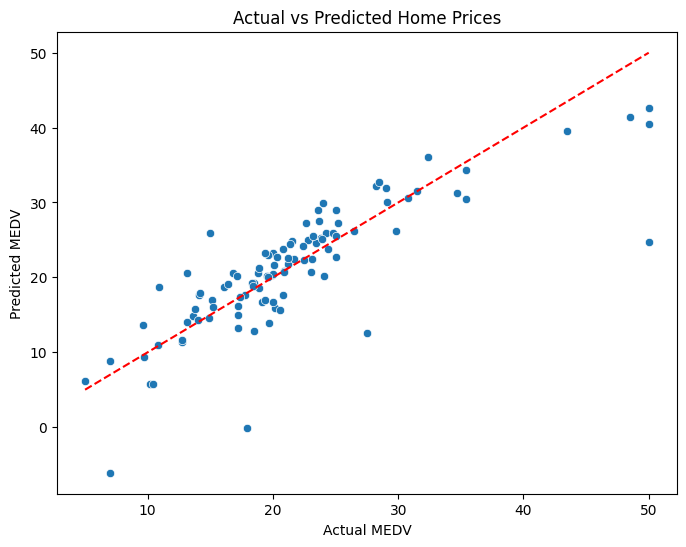

In [23]:
 plt.figure(figsize=(8, 6))
 sns.scatterplot(x=y_test, y=y_pred)
 plt.xlabel("Actual MEDV")
 plt.ylabel("Predicted MEDV")
 plt.title("Actual vs Predicted Home Prices") 
 plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
 plt.show()